In [20]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [21]:
def rargmax(vector):
    m = np.amax(vector)
    print(m)
    indices = np.nonzero(vector == m)[0]
    print(indices)
    return pr.choice(indices)

In [22]:
env = gym.make('FrozenLake-v0')

[2017-07-28 14:36:00,242] Making new env: FrozenLake-v0


In [23]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
learning_rate = 0.85
dis = 0.99
num_episodes = 2000

In [24]:
rList = []

In [27]:
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.rand(1, env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = (1-learning_rate) * Q[state, action]\
            + learning_rate*(reward + dis * np.max(Q[new_state, :]))
        rAll += reward
        state = new_state
    
    rList.append(rAll)

Score over time: 0.6485
final Q-table values
left down light up
[[  5.12043350e-01   1.10374450e-03   1.23244708e-03   1.98303272e-03]
 [  1.46296829e-04   1.73852441e-04   0.00000000e+00   7.69418105e-01]
 [  0.00000000e+00   1.23733254e-03   0.00000000e+00   5.01007728e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   4.58871860e-01]
 [  3.90273108e-01   3.20366871e-06   0.00000000e+00   1.92710536e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.78069351e-05   0.00000000e+00   2.79845387e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.26826896e-03   1.18060240e-01]
 [  0.00000000e+00   1.17741355e-01   0.00000000e+00   0.00000000e+00]
 [  3.47836515e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.0000000

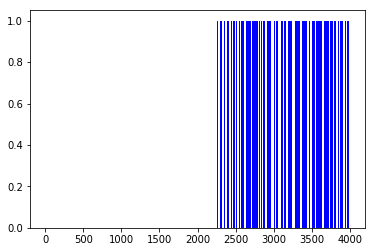

In [28]:
print("Score over time: " + str(sum(rList)/num_episodes))
print("final Q-table values")
print ("left down light up")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()